# Script para automatização de processos de consulta.
     - Inserindo um estado ele procisa me retornar:
     - Numero total de aeroportos com suas classificações
     - Tipos de pavimento de aeroportos e quantidade
     - Total de aeroportos e sua categoria
     - Extensão total de rodovias de acordo com seus pavimentos

In [3]:
# Importando bibliotecas necessárias
import geopandas as gpd
import os
import matplotlib
import matplotlib.pyplot as plt
import shapely

def path_lista():
    path_municipios = os.getcwd()+'//dados//municipios.shp'
    path_aeroportos = os.getcwd()+'//dados//aeroportos.shp'
    path_rodovias = os.getcwd()+'//dados/rodovias.shp'
    
    return[path_municipios, path_aeroportos, path_rodovias]

def open_shapefile():
    
    return [gpd.read_file(i) for i in path_lista()]

def filter_municipios(state, shape):
     
    return  shape [shape['uf'] == state] 

def airports(shape,municipio_filtrado):
    gdf = gpd.sjoin(shape, municipio_filtrado, predicate='within')
    total_airports = gdf.value_counts('TipoAero')
    total_pavi =  gdf.value_counts('pavimento')
    
    return gdf,total_airports,total_pavi

def roads(shape,municipio_filtrado):
    gdf = gpd.overlay(shape,municipio_filtrado, how = 'intersection')
    gdf_proj=gdf.copy()
    gdf_proj['geometry'] = gdf_proj['geometry'].to_crs(epsg = 5880)
    gdf_proj['distance_km'] = gdf_proj['geometry'].length/1000
    distancias = gdf_proj.groupby('nm_tipo_tr').agg('sum')
    
    return gdf,distancias

def run(state):
    shape = open_shapefile()
    municipio_filter = filter_municipios(state,shape[0])
    gdf_airports,aeroportos, pavimentos = airports(shape[1],municipio_filter)
    gdf_roads, stats_distance  = roads(shape[2],municipio_filter)
    print(f'Estatísticas do Estado {state}')
    print(aeroportos)
    print(pavimentos)
    print(stats_distance)
    gdf_airports.plot()
    gdf_roads.plot()

    
    return

Estatísticas do Estado PR
TipoAero
Nacional         97
Internacional     2
dtype: int64
pavimento
asfalto ou concreto Asfáltico    43
grama                            37
terra                            12
cascalho                          6
saibro                            1
dtype: int64
                  OBJECTID   id_trecho_  vl_km_inic  vl_km_fina  vl_extensa  \
nm_tipo_tr                                                                    
Acesso              115341    6186492.0       102.2       295.1       192.9   
Contorno             32967     951789.0        45.7        63.0        17.3   
Eixo Principal     3478311  123613555.0    187507.3    201747.4     14240.1   
Travessia Urbana     21998     634536.0        10.1        52.4        42.3   
Variante             50361    1903380.0        80.2       152.9        72.7   

                  id_versao  Shape_Leng       id    id_pk  distance_km  
nm_tipo_tr                                                              
Acesso   

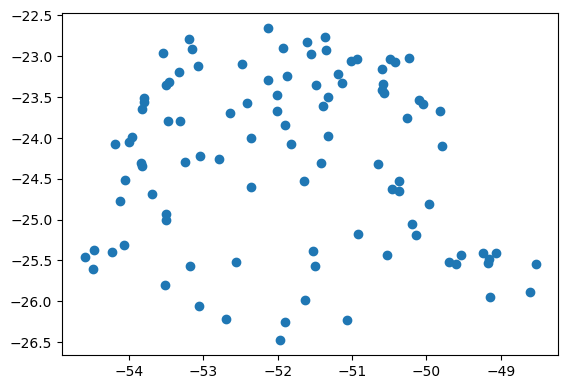

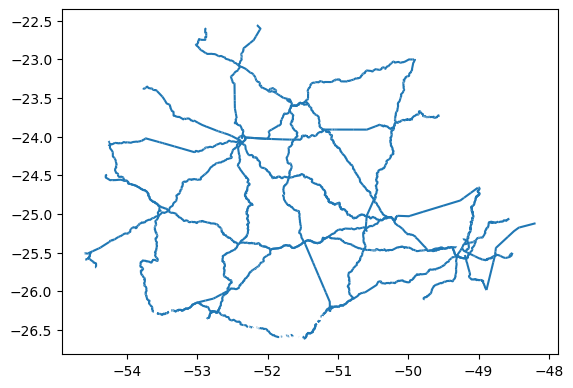

In [4]:
run('PR')

In [ ]:
##Outra forma de realizar a função

import geopandas as gpd
import os

def path_lista():
    # Obtém o caminho do diretório onde o script está localizado
    base_path = os.path.dirname(os.path.abspath(__file__))

    # Constrói os caminhos completos para os shapefiles de municípios, aeroportos e rodovias
    path_municipios = os.path.join(base_path, 'dados', 'municipios.shp')
    path_aeroportos = os.path.join(base_path, 'dados', 'aeroportos.shp')
    path_rodovias = os.path.join(base_path, 'dados', 'rodovias.shp')
    
    return [path_municipios, path_aeroportos, path_rodovias]

def open_shapefile(paths):
    # Lê os shapefiles usando GeoPandas e retorna uma lista de GeoDataFrames
    return [gpd.read_file(i) for i in paths]

def filter_municipios(state, municipio_shape):
    # Filtra os municípios com base no estado fornecido
    return municipio_shape[municipio_shape['uf'] == state] 

def airports(shape, municipio_filtrado):
    # Realiza uma junção espacial entre os aeroportos e os municípios filtrados
    gdf_airports = gpd.sjoin(shape[1], municipio_filtrado, predicate='within')

    # Calcula estatísticas sobre tipos de aeroportos e pavimentos
    total_airports = gdf_airports.value_counts('TipoAero')
    total_pavi =  gdf_airports.value_counts('pavimento')
    
    return gdf_airports, total_airports, total_pavi

def roads(shape, municipio_filtrado):
    # Realiza uma sobreposição espacial entre as rodovias e os municípios filtrados
    gdf_roads = gpd.overlay(shape[2], municipio_filtrado, how='intersection')

    # Projeta as geometrias das rodovias e calcula distâncias em quilômetros
    gdf_proj = gdf_roads.copy()
    gdf_proj['geometry'] = gdf_proj['geometry'].to_crs(epsg=5880)
    gdf_proj['distance_km'] = gdf_proj['geometry'].length / 1000

    # Agrupa por tipo de rodovia e calcula estatísticas de distância
    distancias = gdf_proj.groupby('nm_tipo_tr').agg('sum')
    
    return gdf_roads, distancias

def plot_results(gdf_airports, gdf_roads):
    # Plota os aeroportos e as rodovias usando GeoPandas e Matplotlib
    gdf_airports.plot()
    gdf_roads.plot()
    plt.show()

def run(state):
    # Obtém os caminhos dos shapefiles
    paths = path_lista()

    # Lê os shapefiles
    shape = open_shapefile(paths)

    # Filtra os municípios pelo estado fornecido
    municipio_filter = filter_municipios(state, shape[0])

    # Analisa estatísticas de aeroportos e rodovias
    gdf_airports, aeroportos, pavimentos = airports(shape, municipio_filter)
    gdf_roads, stats_distance = roads(shape, municipio_filter)

    # Imprime as estatísticas
    print(f'Estatísticas do Estado {state}')
    print(aeroportos)
    print(pavimentos)
    print(stats_distance)

    # Plota os resultados
    plot_results(gdf_airports, gdf_roads)
